In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("https://www.sanidad.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Datos_Capacidad_Asistencial_Historico_01032023.csv",encoding='latin-1')
df.dropna(inplace=True)
df["Fecha"] = pd.to_datetime(df['Fecha'],format="%m/%d/%Y")

In [3]:
max_day = df["Fecha"].max()

In [4]:
df_fecha_ccaa = df.groupby(by=["Fecha","CCAA"]).sum().reset_index()

In [5]:
df_last_ccaa = df_fecha_ccaa[df_fecha_ccaa["Fecha"] == max_day].copy()
df_last_ccaa["CAMAS_LIBRES"] = df_last_ccaa["TOTAL_CAMAS"]-df_last_ccaa["OCUPADAS_COVID19"]-df_last_ccaa["OCUPADAS_NO_COVID19"]

### CAMAS LIBRES

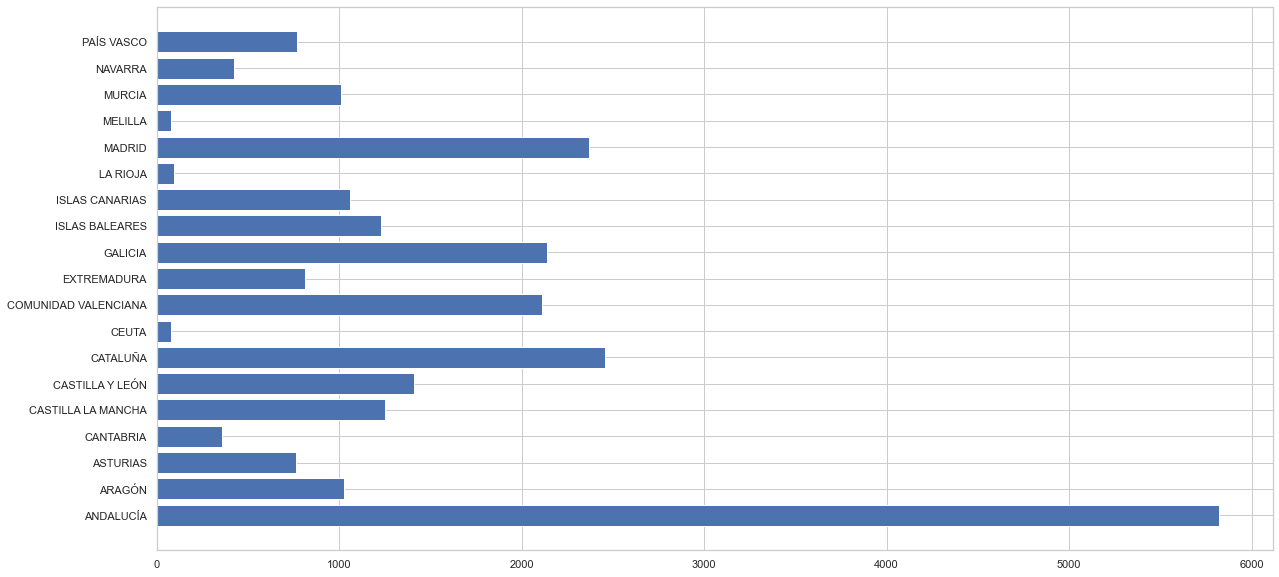

In [6]:
plt.figure(figsize=(20,10))
plt.barh(df_last_ccaa["CCAA"],df_last_ccaa["CAMAS_LIBRES"])
plt.show()

### OCUPADAS POR COVID

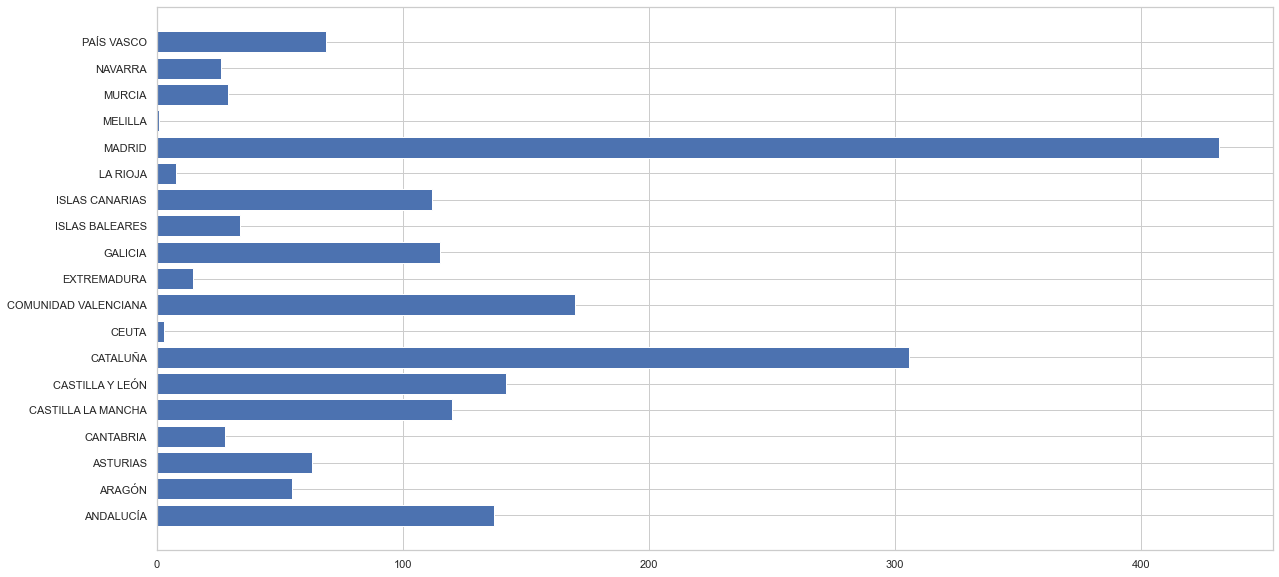

In [7]:
plt.figure(figsize=(20,10))
plt.barh(df_last_ccaa["CCAA"],df_last_ccaa["OCUPADAS_COVID19"])
plt.show()

### % covid


In [8]:
df_last_ccaa["%COVID_TOTAL"] =df_last_ccaa["OCUPADAS_COVID19"] / df_last_ccaa["TOTAL_CAMAS"]

#### del total

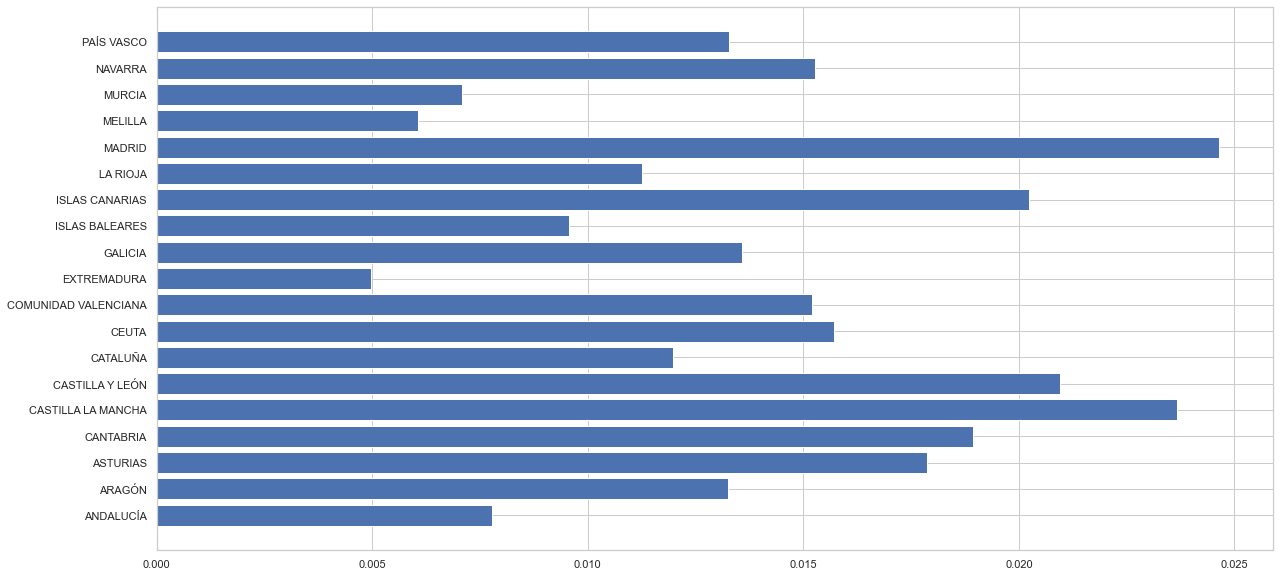

In [9]:
plt.figure(figsize=(20,10))
plt.barh(df_last_ccaa["CCAA"],df_last_ccaa["%COVID_TOTAL"])
plt.show()

In [10]:
df_last_ccaa["%COVID_OCUPADAS"] =df_last_ccaa["OCUPADAS_COVID19"] / (df_last_ccaa["OCUPADAS_COVID19"]+df_last_ccaa["OCUPADAS_NO_COVID19"])

#### de las ocupadas

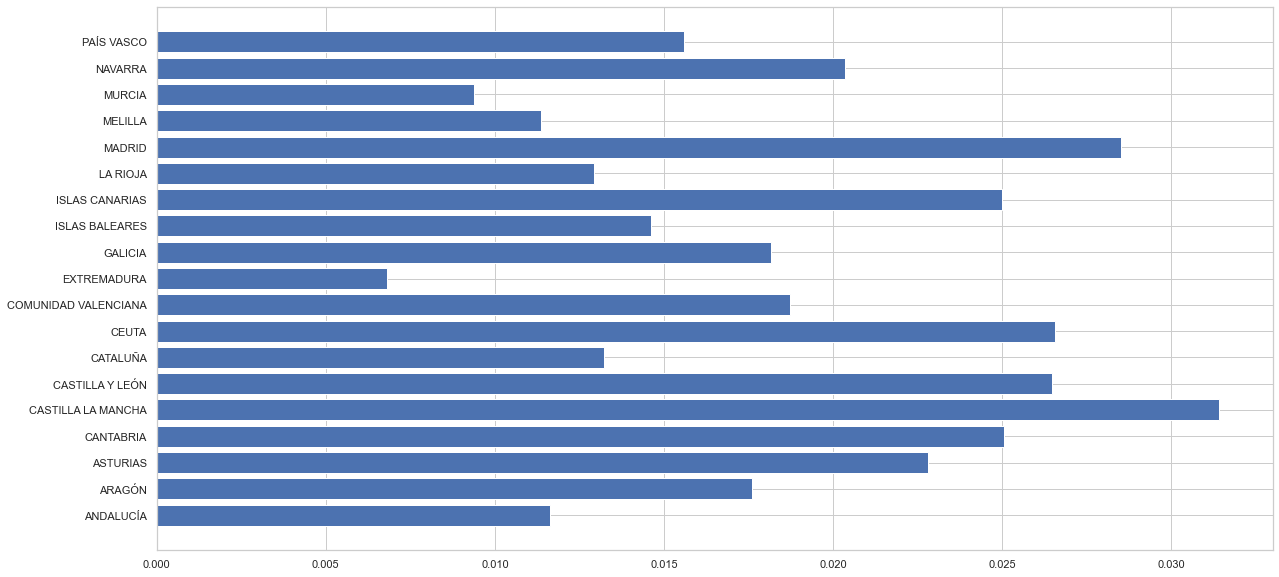

In [11]:
plt.figure(figsize=(20,10))
plt.barh(df_last_ccaa["CCAA"],df_last_ccaa["%COVID_OCUPADAS"])
plt.show()

# UCI

In [12]:
df_uci = df[df["Unidad"].str.contains("U. Cr")]

In [13]:
df_uci_ccaa = df_uci.groupby(by=["Fecha","CCAA"]).sum().reset_index()
df_uci_ccaa = df_uci_ccaa[df_uci_ccaa["Fecha"] == max_day].copy()
df_uci_ccaa["CAMAS_LIBRES"] = df_uci_ccaa["TOTAL_CAMAS"]-df_uci_ccaa["OCUPADAS_COVID19"]-df_uci_ccaa["OCUPADAS_NO_COVID19"]

### CAMAS LIBRES

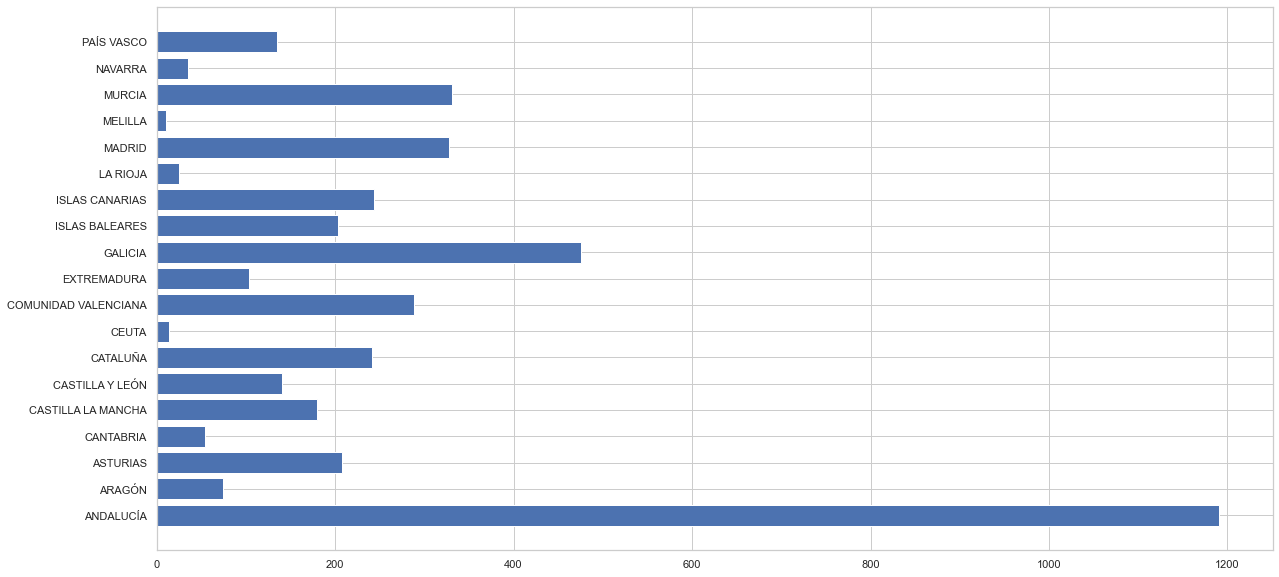

In [14]:
plt.figure(figsize=(20,10))
plt.barh(df_uci_ccaa["CCAA"],df_uci_ccaa["CAMAS_LIBRES"])
plt.show()

### OCUPADAS POR COVID

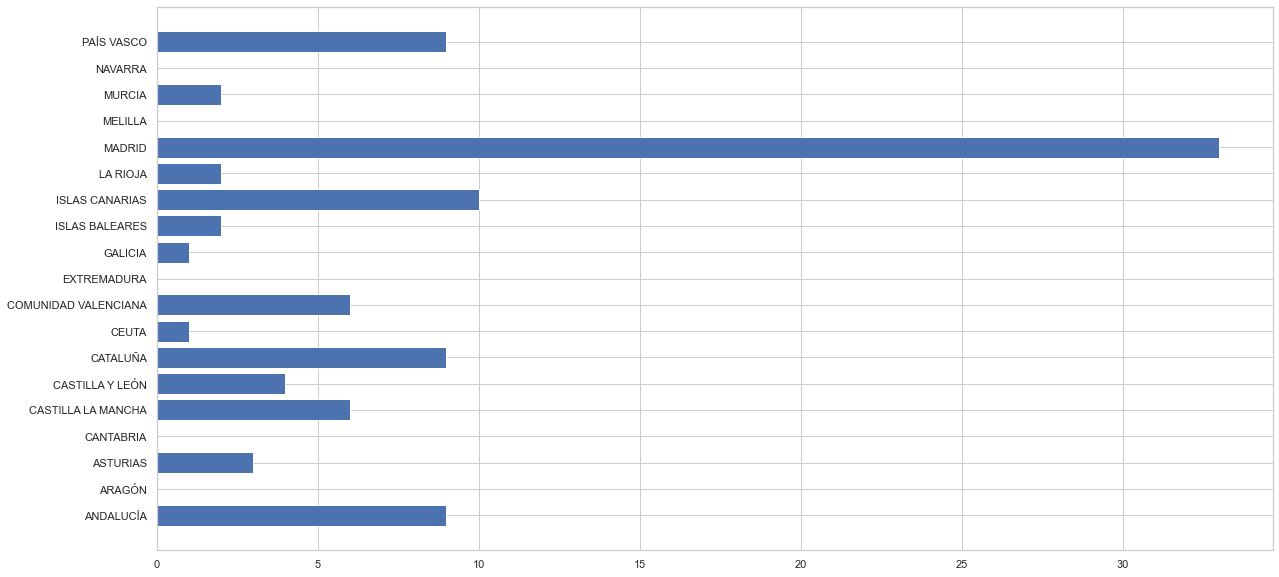

In [15]:
plt.figure(figsize=(20,10))
plt.barh(df_uci_ccaa["CCAA"],df_uci_ccaa["OCUPADAS_COVID19"])
plt.show()

### % covid


In [16]:
df_uci_ccaa["%COVID_TOTAL"] =df_uci_ccaa["OCUPADAS_COVID19"] / df_uci_ccaa["TOTAL_CAMAS"]

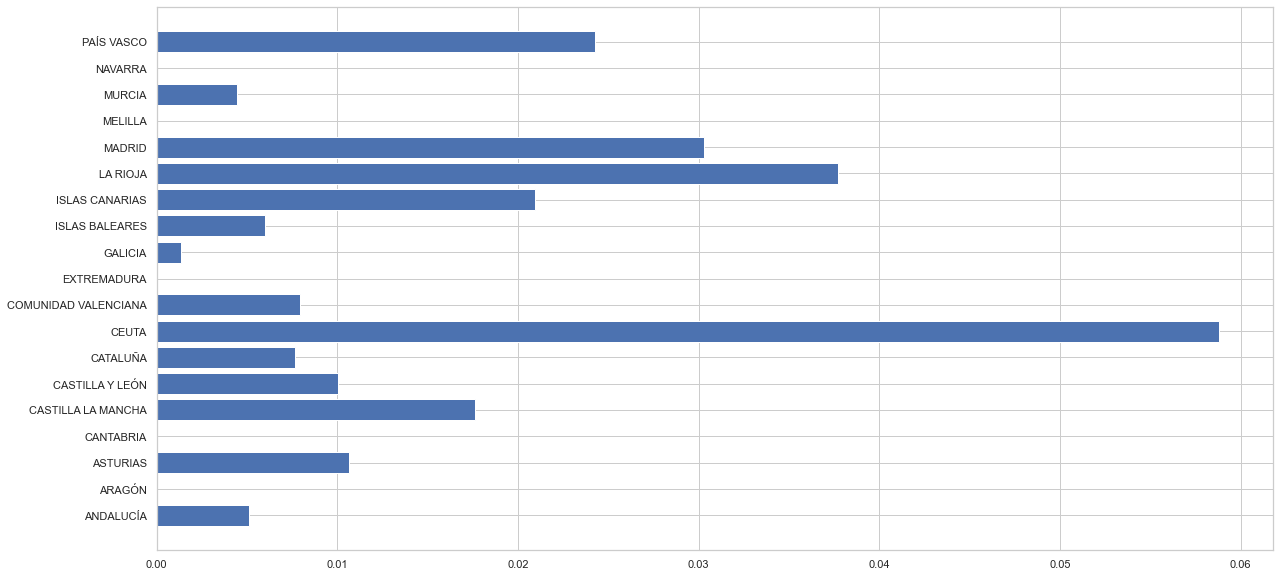

In [17]:
plt.figure(figsize=(20,10))
plt.barh(df_uci_ccaa["CCAA"],df_uci_ccaa["%COVID_TOTAL"])
plt.show()

In [18]:
df_uci_ccaa["%COVID_OCUPADAS"] =df_uci_ccaa["OCUPADAS_COVID19"] / (df_uci_ccaa["OCUPADAS_COVID19"]+df_uci_ccaa["OCUPADAS_NO_COVID19"])

#### de las ocupadas

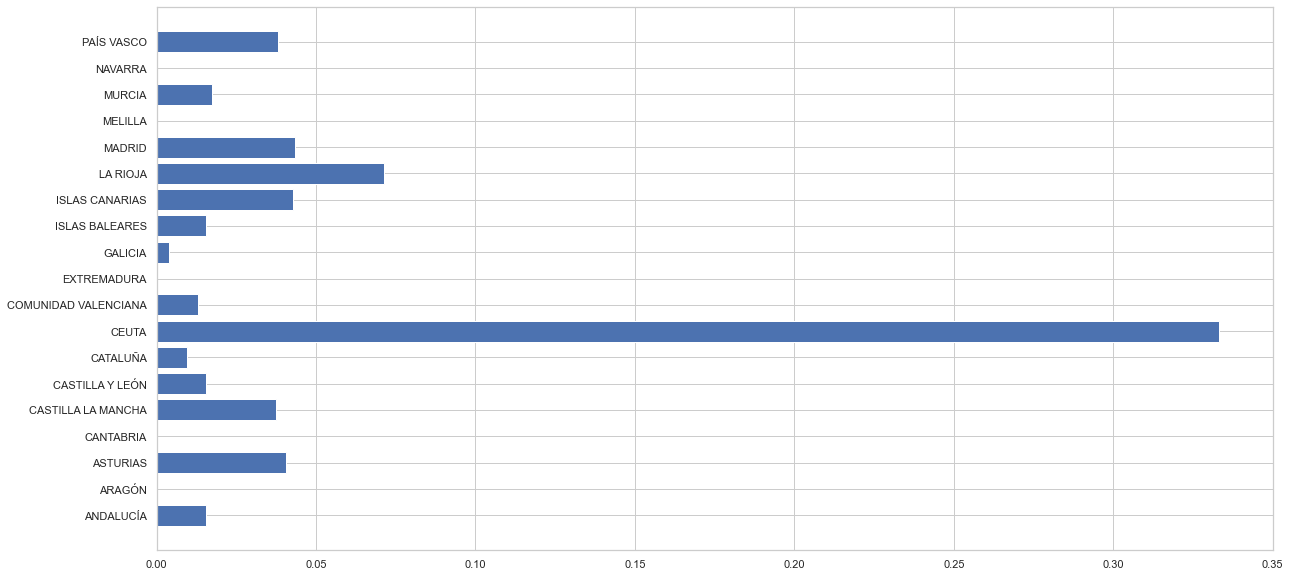

In [19]:
plt.figure(figsize=(20,10))
plt.barh(df_uci_ccaa["CCAA"],df_uci_ccaa["%COVID_OCUPADAS"])
plt.show()

## UCI CON O SIN RESPIRADOR

In [20]:
df_uci = df[df["Unidad"].str.contains("U. Cr")]
df_uci_ccaa = df_uci.groupby(by=["Fecha","CCAA","Unidad"]).sum().reset_index()
df_uci_ccaa = df_uci_ccaa[df_uci_ccaa["Fecha"] == max_day].copy()
df_uci_ccaa["CAMAS_LIBRES"] = df_uci_ccaa["TOTAL_CAMAS"]-df_uci_ccaa["OCUPADAS_COVID19"]-df_uci_ccaa["OCUPADAS_NO_COVID19"]

### CAMAS LIBRES

<AxesSubplot:xlabel='CAMAS_LIBRES', ylabel='CCAA'>

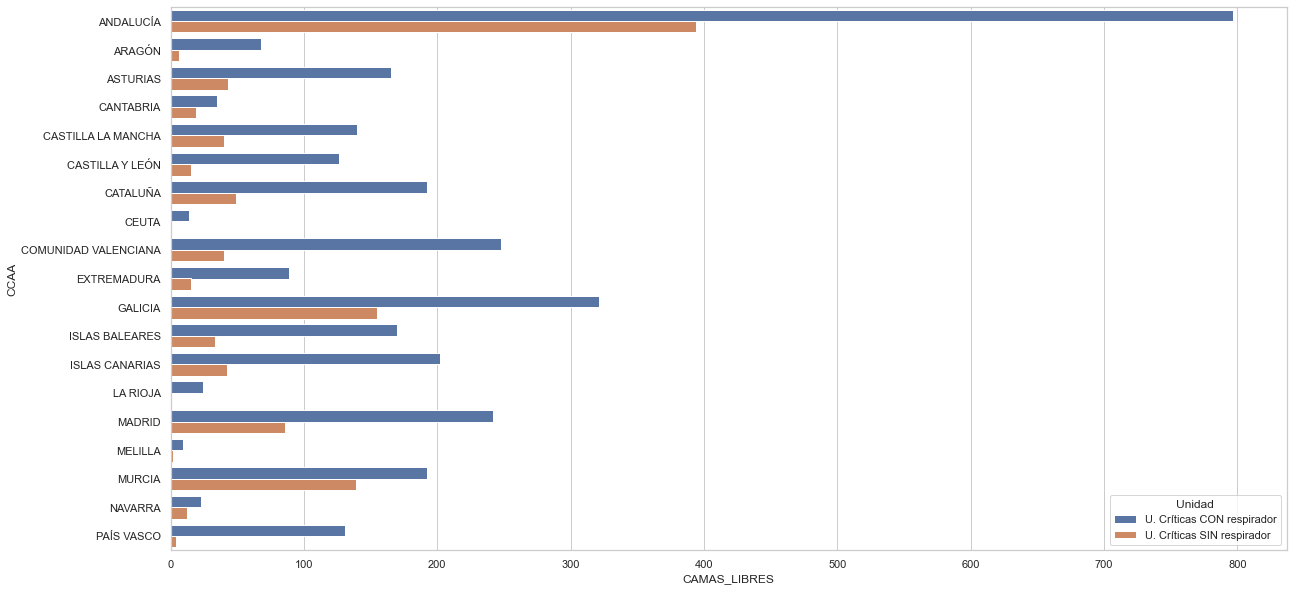

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_uci_ccaa,y="CCAA",x="CAMAS_LIBRES",hue="Unidad")

### OCUPADAS POR COVID

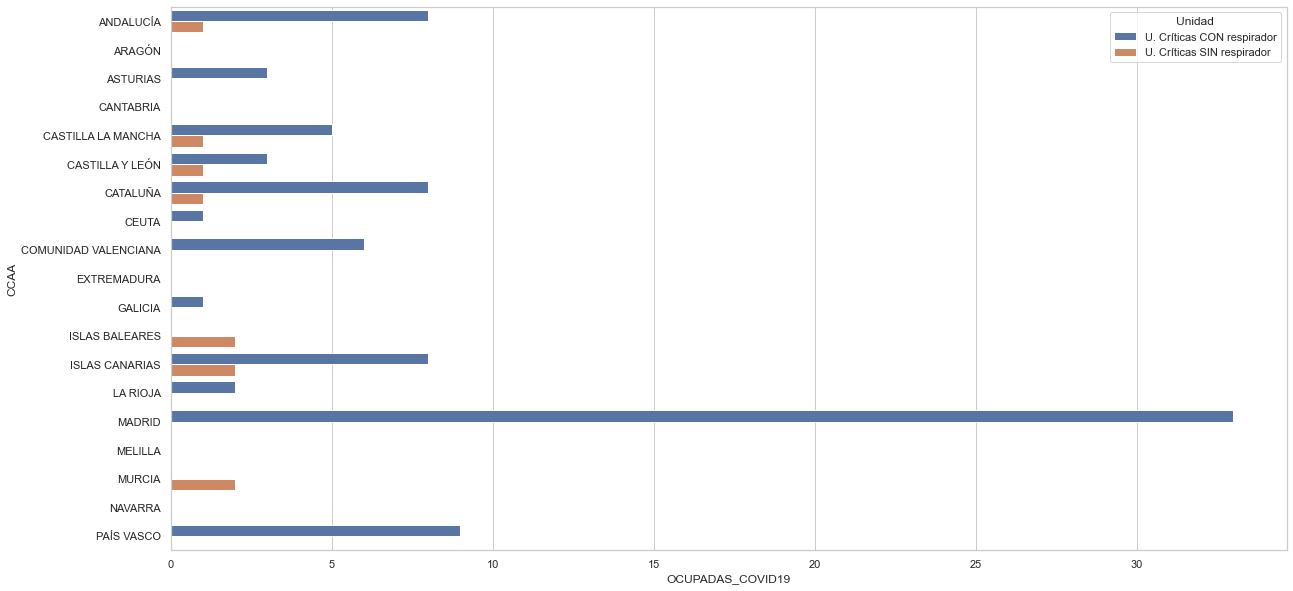

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_uci_ccaa,y="CCAA",x="OCUPADAS_COVID19",hue="Unidad")
plt.show()

### % covid


In [23]:
df_uci_ccaa["%COVID_TOTAL"] =df_uci_ccaa["OCUPADAS_COVID19"] / df_uci_ccaa["TOTAL_CAMAS"]

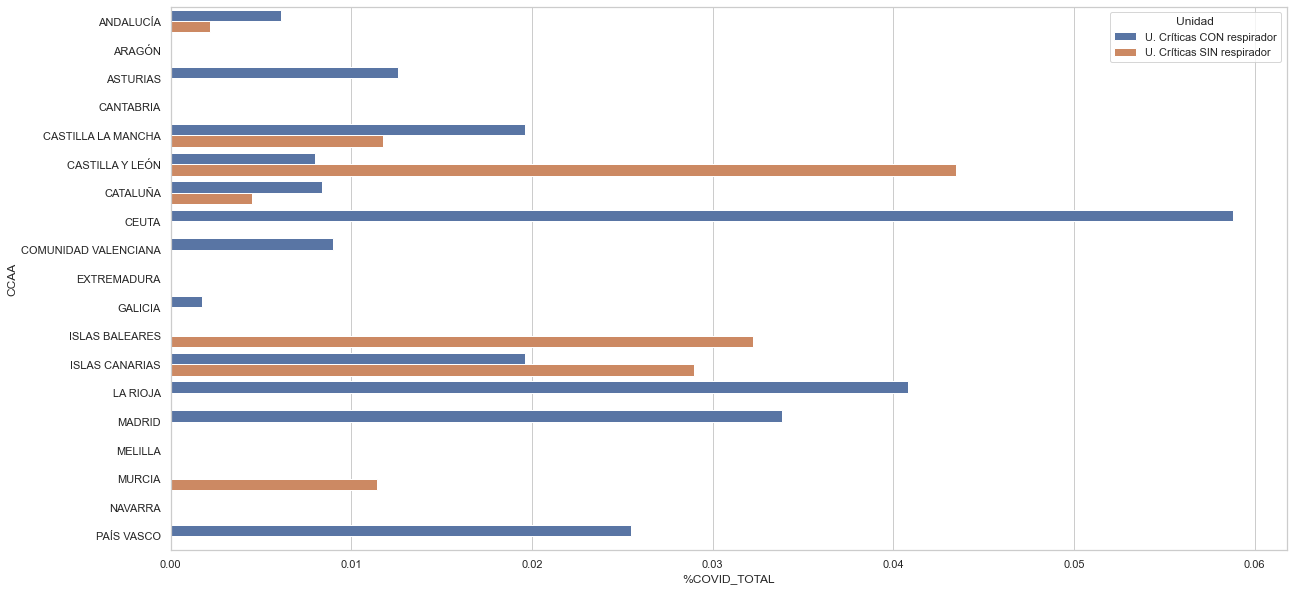

In [24]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_uci_ccaa,y="CCAA",x="%COVID_TOTAL",hue="Unidad")
plt.show()

In [25]:
df_uci_ccaa["%COVID_OCUPADAS"] =df_uci_ccaa["OCUPADAS_COVID19"] / (df_uci_ccaa["OCUPADAS_COVID19"]+df_uci_ccaa["OCUPADAS_NO_COVID19"])

#### de las ocupadas

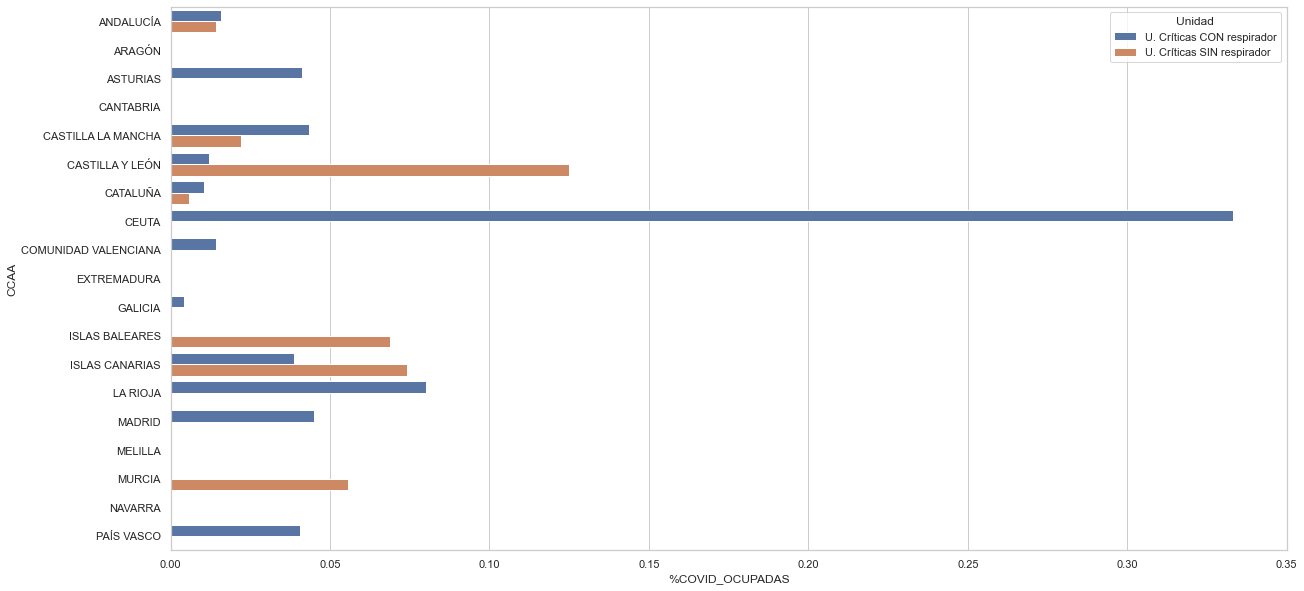

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_uci_ccaa,y="CCAA",x="%COVID_OCUPADAS",hue="Unidad")
plt.show()

In [27]:
df_monthly = df.groupby(by=["CCAA","Unidad"]).resample("M",on="Fecha").sum().reset_index()

In [28]:
df_uci = df_monthly[df_monthly["Unidad"] != "Hospitalización convencional"].groupby(by=["Fecha","CCAA"]).sum().reset_index()
df_normal = df_monthly[df_monthly["Unidad"] == "Hospitalización convencional"].groupby(by=["Fecha","CCAA"]).sum().reset_index()

df_monthly_unidad = pd.concat([df_uci,df_normal]).groupby(by="")

In [29]:
df_monthly_unidad["TOTAL_OCUPADAS"] = (df_monthly_unidad["OCUPADAS_COVID19"] + df_monthly_unidad["OCUPADAS_COVID19"])
df_monthly_unidad["%OCUPADAS"] = df_monthly_unidad["TOTAL_OCUPADAS"] / df_monthly_unidad["TOTAL_CAMAS"]

In [30]:
df_monthly_unidad[["CCAA","Fecha","TOTAL_OCUPADAS","%OCUPADAS"]]

,CCAA,Fecha,TOTAL_OCUPADAS,%OCUPADAS
0,ANDALUCÍA,2020-08-31,2524.0,0.052890
1,ARAGÓN,2020-08-31,3462.0,0.580094
2,ASTURIAS,2020-08-31,210.0,0.026707
3,CANTABRIA,2020-08-31,82.0,0.023001
4,CASTILLA LA MANCHA,2020-08-31,964.0,0.096807
...,...,...,...,...
584,MADRID,2023-02-28,18414.0,0.040157
585,MELILLA,2023-02-28,132.0,0.030612
586,MURCIA,2023-02-28,2628.0,0.025731
587,NAVARRA,2023-02-28,1180.0,0.026218


In [41]:
df_monthly_unidad[(df_monthly_unidad["CCAA"] == "COMUNIDAD VALENCIANA" )& (df_monthly_unidad["Fecha"] == pd.Timestamp(day=31,month=8,year=2020))]

,Fecha,CCAA,COD_CCAA,Cod_Provincia,TOTAL_CAMAS,OCUPADAS_COVID19,CAMAS POR ENFERMOS COVID19*,OCUPADAS_NO_COVID19,INGRESOS_COVID19,ALTAS_24h_COVID19,TOTAL_OCUPADAS,%OCUPADAS
8,2020-08-31,COMUNIDAD VALENCIANA,1860.0,3782.0,31197.0,1078.0,0.0,9808.0,119.0,48.0,2156.0,0.069109
8,2020-08-31,COMUNIDAD VALENCIANA,930.0,1891.0,317650.0,8379.0,0.0,182731.0,1808.0,898.0,16758.0,0.052756


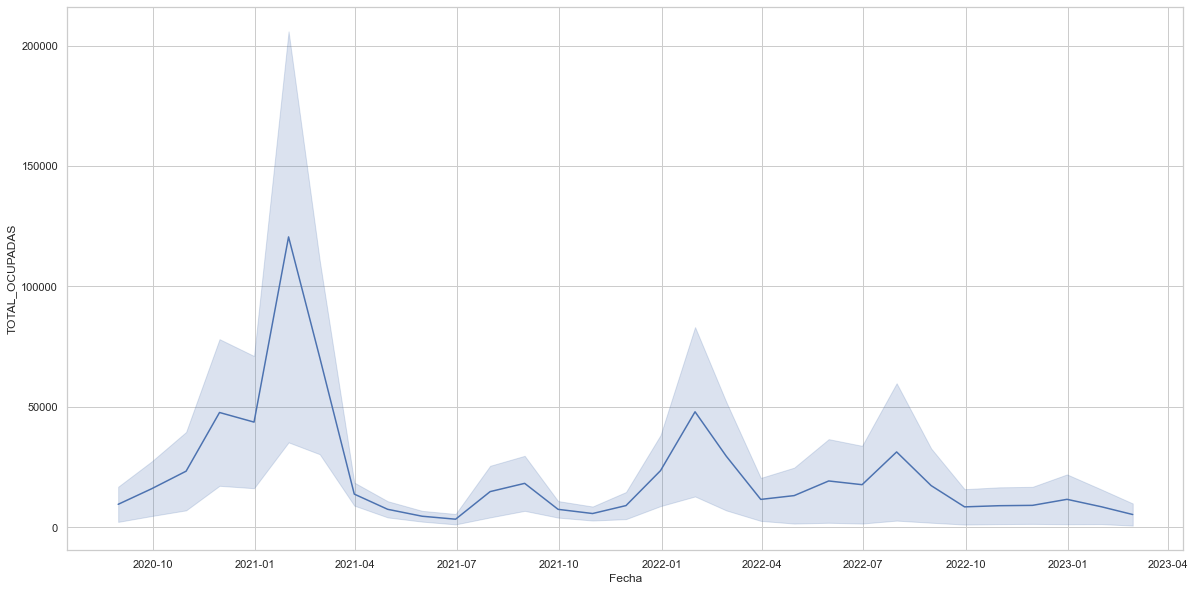

In [31]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_monthly_unidad[df_monthly_unidad["CCAA"] == "COMUNIDAD VALENCIANA"].reset_index(),x="Fecha",y="TOTAL_OCUPADAS")
plt.show()